# Analisis de redes

## Datos
Los datos corresponden a una investigación en curso sobre las percepciones y prácticas del
profesorado universitario sobre el uso de Wikipedia como recurso didáctico. Con base en un
modelo de aceptación de tecnología, se analizan las relaciones dentro de las construcciones
internas y externas del modelo. Tanto la percepción de la opinión de los colegas sobre Wikipedia
como la calidad percibida de la información en Wikipedia juegan un papel central en el modelo
obtenido.


## variables
Se dividió la información en dos partes, la primera con consta de atributos personas de cada
persona entrevistada (como género, edad, usuario registrado en Wikipedia, etc) y la segunda
parte que contiene elementos de la encuesta realizados en una escala de Likert (1-5) que van
desde muy en desacuerdo/nunca (1) hasta muy de acuerdo/siempre (5).


In [30]:
import networkx as nx
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

### Importamos los datos

In [3]:
df = pd.read_csv('dfmini.csv')

#df.info()
df.head()

,Unnamed: 0,AGE,GENDER,DOMAIN,PhD,YEARSEXP,UNIVERSITY,PU1,PU2,PU3,PEU1,PEU2,PEU3
0,1,40,0,Ciencias,1,14,1,4,4,3,5,5,3
1,2,42,0,Derecho y Politica,1,18,1,2,3,3,4,4,3
2,3,37,0,Ingenieria y Arquitectura,1,13,1,2,2,2,4,4,3
3,4,40,0,Ingenieria y Arquitectura,0,13,1,3,3,4,3,3,3
4,5,47,0,Ingenieria y Arquitectura,0,17,1,2,2,3,5,4,3


# analisis exploratorio

In [27]:
df.describe()

,Unnamed: 0,AGE,GENDER,PhD,YEARSEXP,UNIVERSITY,PU1,PU2,PU3,PEU1,PEU2,PEU3
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,25.50000,40.900000,0.320000,0.740000,11.680000,1.0,3.280000,3.260000,3.62000,4.260000,4.120000,3.320000
std,14.57738,7.738718,0.471212,0.443087,6.313057,0.0,0.948468,0.828325,0.85452,0.750782,0.659004,0.683329
min,1.00000,29.000000,0.000000,0.000000,2.000000,1.0,2.000000,2.000000,2.00000,3.000000,2.000000,2.000000
25%,13.25000,35.250000,0.000000,0.250000,7.000000,1.0,3.000000,3.000000,3.00000,4.000000,4.000000,3.000000
50%,25.50000,40.000000,0.000000,1.000000,12.000000,1.0,3.000000,3.000000,4.00000,4.000000,4.000000,3.000000
75%,37.75000,45.500000,1.000000,1.000000,15.000000,1.0,4.000000,4.000000,4.00000,5.000000,4.750000,4.000000
max,50.00000,62.000000,1.000000,1.000000,36.000000,1.0,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000


In [28]:
df.isnull().sum()

Unnamed: 0    0
AGE           0
GENDER        0
DOMAIN        0
PhD           0
YEARSEXP      0
UNIVERSITY    0
PU1           0
PU2           0
PU3           0
PEU1          0
PEU2          0
PEU3          0
dtype: int64

C:\Users\javoe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE', ylabel='count'>

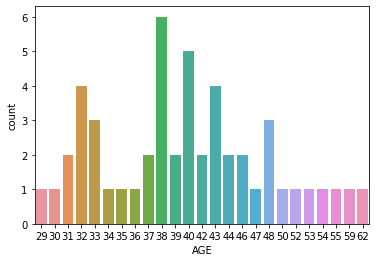

In [38]:
sns.countplot(df['AGE'])

C:\Users\javoe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GENDER', ylabel='count'>

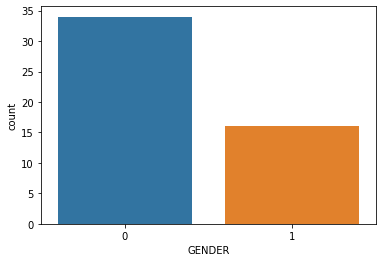

In [37]:
sns.countplot(df['GENDER'])

C:\Users\javoe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DOMAIN', ylabel='count'>

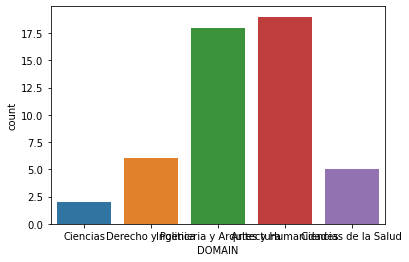

In [40]:
sns.countplot(df['DOMAIN'])

<AxesSubplot:>

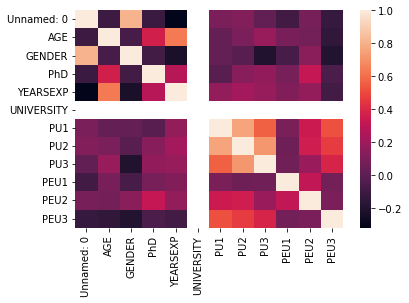

In [35]:
sns.heatmap(df.corr())

In [ ]:
d = tuple( ,dict([(i,[a,b]) for i,a,b in zip(df['AGE'], df['Age'],df['Course'])]))
print(d)

nodes = list([tuple(,dict())for i])


In [44]:
#pasar data frame a nodos
atributes = [1,2,3,4,6] #lista de indices de columnas que son atributos del nodo
x = list([tuple([i,df.iloc[i:i+1,atributes].to_dict("records")[0]]) for i in range(df.shape[0])])
# '''otra forma recorrer lista de diccionarios transformando cada
# elemento de la lista a una tupla tipo(diccionario[0],diccionario[-0]
# seria algo del siguiente estilo
# lista = lista de diccionarios tipo [{},{},{}]
# nodos = [tuple([dic[nombre],dic[atributos]) for dic in lista]  quizas agregar list() al principio
# dic[nombre] debe ser un string
# dic[atributos] debe ser diccionario de atributos
# '''



In [47]:
# #G.add_nodes_from(["Meg Ryan", "Parker Posey", "Lisa Kudrow"])
# '''
# G.add_nodes_from([
#     (4, {"color": "red"}),
#     (5, {"color": "green"}),
# ])
# '''
# # df.shape[0]

# Redes

### Definimos los nodos

In [49]:
#pasar data frame a nodos
atributes = [1,2,3,4,6] #lista de indices de columnas que son atributos del nodo
nodes = list([tuple([i,df.iloc[i:i+1,atributes].to_dict("records")[0]]) for i in range(df.shape[0])]) #falta robustes en nombre acceder a el mediante df['nombre'][indice]
G = nx.Graph()
G.add_nodes_from(nodes) # seeting nodes names

In [53]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49))

In [42]:
# G.nodes(data=True)
# nx.get_node_attributes(G, "name")
#print(G[0]) #acceder a nodos a los cuales esta conectado

## Agregando aristas

In [ ]:
''' Agregar aristas mediante doble loop comparando preguntas de las encuestas para dar peso
y comparando atributos en comun entre nodos para asignarlos como atributos a la arista
Warning: el loop interno sera cada vez mas pequeno para evitar duplicar aristas el ultimo nodo no se compara con ningun otro
'''

# simplificar crear conexion si solo si existe coincidencia... coincidencia en que? en atributos o en respuestas de un tema?
# o en todas las respuestas?????

In [51]:
n,ite= df.shape[0],0
for nodo in range(n):
    ite += 1
    for nodo2 in range(ite,n):
        #print(nodo,nodo2)
        if df.PU1[nodo] == df.PU1[nodo2] and df.PU2[nodo] == df.PU2[nodo2] and df.PU3[nodo] == df.PU3[nodo2]:
            G.add_edge(nodo,nodo2)
    pass
G.edges

EdgeView([(1, 14), (1, 23), (1, 40), (1, 41), (2, 24), (2, 34), (3, 6), (3, 13), (3, 21), (3, 49), (5, 8), (5, 29), (5, 30), (6, 13), (6, 21), (6, 49), (7, 11), (7, 15), (7, 16), (7, 19), (7, 20), (7, 37), (7, 39), (7, 48), (8, 29), (8, 30), (10, 12), (10, 17), (10, 18), (11, 15), (11, 16), (11, 19), (11, 20), (11, 37), (11, 39), (11, 48), (12, 17), (12, 18), (13, 21), (13, 49), (14, 23), (14, 40), (14, 41), (15, 16), (15, 19), (15, 20), (15, 37), (15, 39), (15, 48), (16, 19), (16, 20), (16, 37), (16, 39), (16, 48), (17, 18), (19, 20), (19, 37), (19, 39), (19, 48), (20, 37), (20, 39), (20, 48), (21, 49), (22, 35), (22, 36), (22, 43), (22, 45), (23, 40), (23, 41), (24, 34), (26, 38), (28, 33), (29, 30), (31, 32), (31, 46), (32, 46), (35, 36), (35, 43), (35, 45), (36, 43), (36, 45), (37, 39), (37, 48), (39, 48), (40, 41), (43, 45)])

# Segunda red


### Definimos los nodos

In [54]:
#pasar data frame a nodos
atributes = [1,2,3,4,6] #lista de indices de columnas que son atributos del nodo
nodes = list([tuple([i,df.iloc[i:i+1,atributes].to_dict("records")[0]]) for i in range(df.shape[0])]) #falta robustes en nombre acceder a el mediante df['nombre'][indice]
F = nx.Graph()
F.add_nodes_from(nodes) # seeting nodes names
F.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49))

## Agregando aristas

In [55]:
n,ite= df.shape[0],0
for nodo in range(n):
    ite += 1
    for nodo2 in range(ite,n):
        #print(nodo,nodo2)
        if df.PEU1[nodo] == df.PEU1[nodo2] and df.PEU2[nodo] == df.PEU2[nodo2] and df.PEU3[nodo] == df.PEU3[nodo2]:
            F.add_edge(nodo,nodo2)
    pass
F.edges

EdgeView([(0, 15), (1, 2), (1, 13), (1, 20), (1, 34), (1, 35), (1, 40), (2, 13), (2, 20), (2, 34), (2, 35), (2, 40), (3, 49), (4, 10), (4, 16), (4, 17), (4, 21), (4, 26), (4, 42), (4, 43), (5, 47), (6, 8), (6, 25), (6, 30), (8, 25), (8, 30), (9, 12), (9, 14), (9, 32), (9, 39), (10, 16), (10, 17), (10, 21), (10, 26), (10, 42), (10, 43), (12, 14), (12, 32), (12, 39), (13, 20), (13, 34), (13, 35), (13, 40), (14, 32), (14, 39), (16, 17), (16, 21), (16, 26), (16, 42), (16, 43), (17, 21), (17, 26), (17, 42), (17, 43), (18, 37), (19, 28), (19, 33), (20, 34), (20, 35), (20, 40), (21, 26), (21, 42), (21, 43), (22, 31), (22, 46), (25, 30), (26, 42), (26, 43), (28, 33), (31, 46), (32, 39), (34, 35), (34, 40), (35, 40), (36, 41), (38, 48), (42, 43)])

In [56]:
print("El numero de vertices del primer grafo es: ",len(G. edges))
print("El numero de vertices del segundo grafo es: ",len(F. edges))

El numero de vertices del primer grafo es:  86
El numero de vertices del segundo grafo es:  77


In [58]:
import networkx.algorithms.isomorphism as iso
em = iso.numerical_edge_match('weight', 1)
print("El isomorfismo entre ambas redes es:",nx.is_isomorphic(G,F)  )

El isomorfismo entre ambas redes es: False


## Conclusion
Un analisis de semejanzas entre redes seria mas informativo que un analisis de congruencias por lo que se aplicara dicho analisis posteriormente